In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
%matplotlib inline

In [2]:
# load data
data = pd.read_csv('data.csv')

#test, 5 random rows
data.sample(5)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
76392,0.584,1936,0.458,"['Dale Carnegie', 'Till Hagen', 'Stefan Kamins...",0.720,515200,0.415,0,506JQTLgBh3dk1PpOKp5vL,0.000000,6,0.2410,-12.748,1,"Wie man Freunde gewinnt - Die Kunst, beliebt u...",20,1936,0.9200,125.466
41377,0.776,1940,0.758,"['Rita Ampatzi', 'Xaralampos Margelis', 'Klari...",0.382,196653,0.537,0,126RPwy75yPCLViSiOYvMN,0.001370,9,0.1460,-8.364,0,Perivoli m' orgomeno,0,1940-01-01,0.0355,111.161
40611,0.815,1937,0.440,['Mushy Peas'],0.245,129229,0.677,0,4MstqqhQIVioUHy0Og8dFh,0.000303,7,0.2190,-11.649,1,Nineteen,0,1937-01-17,0.0409,156.419
135684,0.971,1994,0.771,['Lalo Mora'],0.666,160493,0.384,0,3RzxBoY4JgYKTQwiGlpctO,0.000005,3,0.0857,-10.649,1,Ojitos a Mi Gusto,37,1994-01-01,0.0638,95.144
112060,0.698,1956,0.817,['Sister Rosetta Tharpe'],0.465,161049,0.575,0,0XbwvIZe6Cm1WZph6rGWxu,0.000002,0,0.2560,-4.841,1,Precious Memories,7,1956-03-23,0.0378,119.192


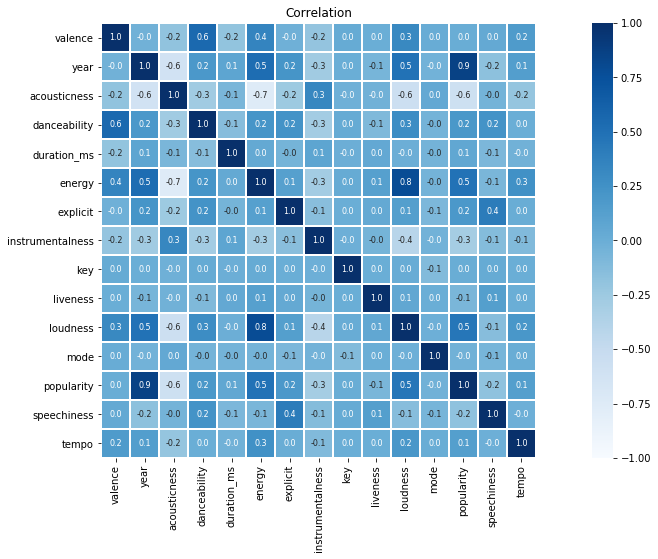

In [3]:
# find correlation
corr = data.corr()
# visualize correlation with heatmap
plt.figure(figsize=(20,8))
sns.heatmap(corr, vmax=1, vmin=-1, center=0,linewidth=.5,square=True, annot = True, annot_kws = {'size':8},fmt='.1f', cmap='Blues')
plt.title('Correlation')
plt.show()

In [4]:
# preprocessing
song_features = pd.DataFrame()
scaler = MinMaxScaler()
for col in data.iloc[:,:-1].columns:      # exclude year 
    if data[col].dtypes in ['float64', 'int64']:
        scaler.fit(data[[col]])
        song_features[col] = scaler.transform(data[col].values.reshape(-1,1)).ravel()   


In [5]:
#test
song_features.sample(5)


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness
32595,0.657,0.696970,0.095783,0.951417,0.042220,0.662,0.0,0.000000,0.636364,0.376,0.802036,1.0,0.43,0.301031
57974,0.858,0.080808,0.478916,0.751012,0.022116,0.280,1.0,0.000000,0.090909,0.645,0.666213,1.0,0.00,0.919588
89242,0.964,0.848485,0.298193,0.721660,0.032810,0.629,0.0,0.001710,0.727273,0.180,0.842017,1.0,0.50,0.048969
119539,0.737,0.727273,0.568273,0.608300,0.019554,0.689,0.0,0.000000,0.454545,0.370,0.855469,1.0,0.41,0.027732
148911,0.675,0.656566,0.152610,0.649798,0.039073,0.347,0.0,0.000006,0.909091,0.055,0.669689,1.0,0.22,0.056186


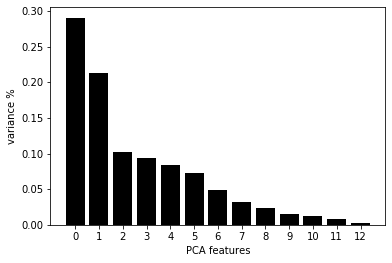

In [6]:
# create pca instance
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(song_features)

# plot explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# save pca components to a data frame 
PCA_components = pd.DataFrame(principalComponents)


In [7]:
# drops off at 2 ! awesome
# just want to see what it looks like
PCA_components.sample(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12
154986,-0.000482,0.752998,0.347230,0.551054,-0.075358,0.291509,-0.390824,-0.013801,0.403467,0.242826,0.167631,-0.025004,-0.123742
8777,0.354250,-0.234256,-0.164398,0.117304,0.189038,-0.357088,-0.127178,-0.059627,-0.009845,-0.024381,0.021545,0.204642,0.040321
162261,0.095357,-0.296751,-0.021952,0.013315,0.046809,-0.209115,0.037048,-0.037749,-0.001421,-0.041984,0.011367,-0.027062,0.017022
67725,-0.354598,-0.399244,0.135362,-0.281051,-0.218954,0.103898,-0.159160,-0.351536,0.232933,-0.274628,0.081117,0.013390,0.037690
115393,-0.226262,-0.376023,0.260875,0.010617,-0.076064,-0.087838,0.314857,-0.261143,-0.072203,-0.082667,0.031083,-0.008973,0.066597


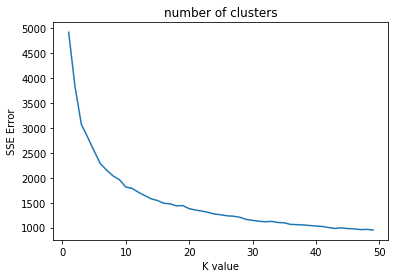

In [8]:
# k clustering
km = KMeans()
k_rng = range(1,50)  # k value
sse = [] # sse value for each k
for i in k_rng:
    km = KMeans(n_clusters = i)
    km.fit(song_features.sample(5000))
    sse.append(km.inertia_) 
    
# visualize 
plt.plot(k_rng,sse)
plt.xlabel('K value')
plt.ylabel('SSE Error')
plt.title('number of clusters')
plt.show()

# looks like good cut off is between 8 and 15

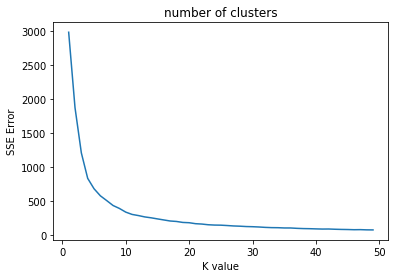

In [9]:
# using pca components

km = KMeans()
k_rng = range(1,50)  # k value
sse = [] # sse value for each k
for i in k_rng:
    km = KMeans(n_clusters = i)
    #first 3 pca components
    km.fit(PCA_components.iloc[:,:3].sample(5000))
    sse.append(km.inertia_) 
    
#visualize 
plt.plot(k_rng,sse)
plt.xlabel('K value')
plt.ylabel('SSE Error')
plt.title('number of clusters')
plt.show()

#similar drop off, slightly lower. ~8 genres?
# tried both just to see what the difference would be/get a better grasp on what pca does
#i think this is the one we should use

In [10]:
#using song-features (i.e. not pca) with k = 15

km = KMeans(n_clusters=15)
predicted_genre = km.fit_predict(song_features)


In [11]:
# adding predicted genre column
song_features['predicted_genre'] = predicted_genre
song_features['predicted_genre'] = song_features['predicted_genre'].apply(lambda x: 'Genre '+ str(x))
song_features.sample(10)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,predicted_genre
30303,0.8280,0.575758,0.007129,0.521255,0.049447,0.8540,0.0,0.000001,0.818182,0.3450,0.825010,0.0,0.45,0.039381,Genre 13
146966,0.3730,0.555556,0.636546,0.325911,0.053764,0.3430,0.0,0.000008,0.909091,0.1260,0.820687,1.0,0.21,0.034227,Genre 8
19381,0.1870,0.979798,0.924699,0.787449,0.031744,0.4220,1.0,0.009240,0.000000,0.0958,0.781239,1.0,0.76,0.049691,Genre 4
18165,0.2660,0.919192,0.000182,0.447368,0.041340,0.9390,0.0,0.005680,0.727273,0.0857,0.874168,1.0,0.62,0.096907,Genre 10
123404,0.0915,0.929293,0.870482,0.458502,0.041548,0.1460,0.0,0.000003,0.181818,0.0945,0.799060,1.0,0.60,0.035361,Genre 6
114163,0.6950,0.454545,0.492972,0.457490,0.028107,0.6570,0.0,0.000000,0.636364,0.2190,0.795239,1.0,0.22,0.057320,Genre 10
79203,0.4600,0.333333,0.992972,0.640688,0.015429,0.0758,0.0,0.000045,0.090909,0.1240,0.664693,1.0,0.04,0.067113,Genre 0
70423,0.1120,0.757576,0.497992,0.256073,0.051778,0.4350,1.0,0.119000,0.181818,0.5830,0.749933,1.0,0.46,0.033402,Genre 4
63212,0.6700,0.393939,0.844378,0.541498,0.031977,0.4850,0.0,0.000081,0.181818,0.7390,0.812544,0.0,0.20,0.162887,Genre 3
108086,0.2050,0.969697,0.034839,0.714575,0.045147,0.5570,1.0,0.000000,0.000000,0.2760,0.848798,1.0,0.62,0.083814,Genre 4


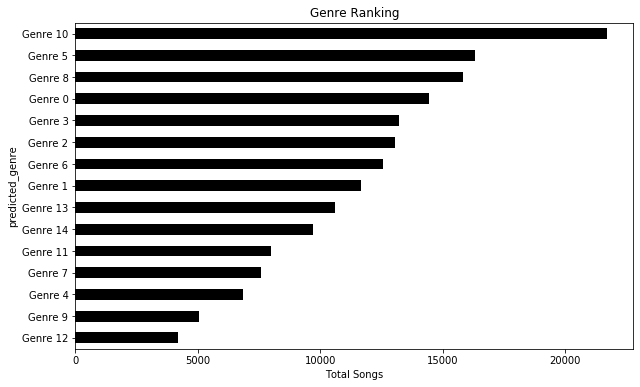

In [12]:
# how many songs falls in each genre, sorted
genres_grp = song_features.groupby(['predicted_genre']).size()
plt.figure(figsize=(10,6))
genres_grp.sort_values(ascending=True).plot.barh(color='black')
plt.xlabel('Total Songs')
plt.title('Genre Ranking')
plt.show()

#not sure what happened here re: combined in/out cells

In [13]:
# same thing with pca
km = KMeans(n_clusters=15)
pca_predicted_genre = km.fit_predict(PCA_components)

In [14]:
# adding predicted genre column
PCA_components['predicted_genre'] = pca_predicted_genre
PCA_components['predicted_genre'] = PCA_components['predicted_genre'].apply(lambda x: 'Genre '+ str(x))
PCA_components.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,predicted_genre
46486,0.271621,-0.254368,-0.258872,-0.077437,0.011819,-0.181561,-0.034219,0.031020,-0.060680,-0.116220,0.145038,0.006936,-0.065271,Genre 13
122422,-0.717367,0.659300,-0.336888,0.062855,-0.154633,-0.058783,-0.015221,-0.099015,0.109186,0.088124,0.141401,-0.121431,-0.082985,Genre 5
5695,0.221836,-0.361275,0.193973,-0.597460,-0.213848,0.047759,0.003389,0.049730,-0.028939,-0.113383,0.044149,0.025502,-0.046562,Genre 3
9250,0.170381,-0.334492,0.193996,-0.160479,-0.000025,-0.245826,-0.251540,-0.039959,-0.024060,-0.018685,0.156131,0.264228,0.001825,Genre 3
51665,-0.613994,-0.468368,0.291099,-0.337764,-0.387115,0.128258,-0.095175,-0.077804,-0.038355,-0.008855,0.004752,0.007206,0.025453,Genre 1
18838,-0.923500,0.613112,0.374057,0.116497,0.680995,0.100846,-0.234050,0.037633,-0.263956,-0.171178,0.072769,0.126764,-0.037808,Genre 11
15320,-0.601173,-0.314551,-0.232615,0.312443,-0.477449,0.562556,-0.307869,-0.073901,0.035974,0.086682,0.005790,0.148830,-0.011972,Genre 2
98384,0.004775,-0.256008,-0.102810,0.317978,-0.069903,0.124470,0.288312,-0.135736,0.033696,-0.136324,0.058047,0.001057,-0.008797,Genre 12
89839,-0.765301,0.590241,0.236075,0.273287,-0.117645,-0.254482,0.180486,-0.083133,-0.109786,0.158992,-0.097443,-0.011780,0.005587,Genre 9
169668,-0.473365,0.667028,-0.107581,0.120074,-0.008709,-0.281663,-0.247482,0.021617,0.146707,0.151861,-0.185216,-0.058074,-0.043804,Genre 5


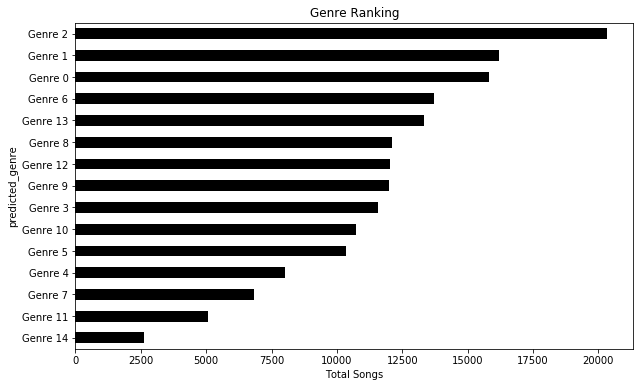

In [15]:
# how many songs falls in each genre, sorted
genres_grp = PCA_components.groupby(['predicted_genre']).size()
plt.figure(figsize=(10,6))
genres_grp.sort_values(ascending=True).plot.barh(color='black')
plt.xlabel('Total Songs')
plt.title('Genre Ranking')
plt.show()